In [1]:
import logging
import os
import pandas as pd
import numpy as np
import json

from pathlib import Path

%load_ext autoreload
%autoreload 2

# Disable logging of the program in the notebook
os.environ["LOGLEVEL"] = "CRITICAL"

logging.basicConfig()
logging.root.setLevel(logging.INFO)
logging.basicConfig(level=logging.INFO)

logger = logging.getLogger('__main__')
logger.setLevel(os.environ.get("LOGLEVEL", logging.FATAL))

pybooklogger = logging.getLogger('pybook')
pybooklogger.setLevel(logging.DEBUG)

%aimport setup

from setup import *

# Track Layout
Calculate the layout of the dutch railway system


In [2]:
layout_file =   "../data/prorail/parsed/netherlands-schiphol.json"
layout = Layout(layout_file)

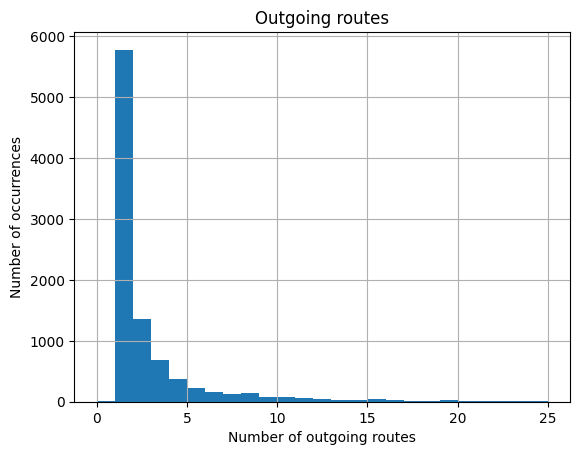

In [3]:
edges_df = pd.DataFrame({"Outgoing routes": [len(n.outgoing) for n in layout.g_block.nodes.values() if len(n.outgoing) <= 25]})
hist = edges_df.hist(bins=25, )
plt.xlabel("Number of outgoing routes")
plt.ylabel("Number of occurrences")
plt.show()

# Experiment Runtime
Take a route of an agent with many stops, and run from start to every stop as an experiment

In [4]:
scenario_file = "../data/prorail/scenarios/RT/2025-07-04_2.json"

try:
    base_path = Path(__file__).parent
    file_path = (base_path / scenario_file).resolve()
    data = json.load(open(file_path))
except:
    data = json.load(open(scenario_file))
types = {x["name"]: x for x in data["types"]}
agents = []
pybooklogger.setLevel(logging.CRITICAL)
logger.setLevel(logging.CRITICAL)
for trainNumber, entry in enumerate(data["trains"]):
    trainNumber += 1
    move = entry["movements"][0]
    velocity = types[entry["trainUnitTypes"][0]]["speed"] / 3.6
    block_path = layout.get_path_for_agent(move, trainNumber, velocity)

    agent = Agent(trainNumber, move["startLocation"], move["endLocation"], velocity, move["startTime"],
                  endTime=move["endTime"],
                  startTimeHuman=str(timedelta(seconds=move["startTime"])),
                  endTimeHuman=str(timedelta(seconds=move["endTime"])),
                  blockPath=block_path,
                  trainNumber=entry["trainNumber"],
                  trainUnitTypes=entry["trainUnitTypes"],
                  stops=move["stops"]
    )
    agents.append(agent)

agent_df = pd.DataFrame([agent.__dict__ for agent in agents])
agent_df['blockPathLength'] = agent_df['blockPath'].map(len)

print(f"total blocks in path: {agent_df['blockPathLength'].sum()}")

agent_df

total blocks in path: 9141


,id,origin,destination,velocity,start_time,endTime,startTimeHuman,endTimeHuman,blockPath,trainNumber,trainUnitTypes,stops,blockPathLength
0,1,GVC|1,DDR|3a,38.888889,1800.0,5160.0,0:30:00,1:26:00,"[r-Gvc|52--r-Gv|232, r-Gv|232--r-Gv|304, r-Gv|...",5045,[SNG],"[{'expected_arrival': 1980.0, 'location': 'GV|...",48
1,2,RTD|14,UT|11,38.888889,540.0,2760.0,0:09:00,0:46:00,"[r-Rtd|260--r-Rtd|162, r-Rtd|162--r-Rtd|402, r...",2841,[DDZ],"[{'expected_arrival': 1020.0, 'location': 'RTA...",53
2,3,ASDZ|3,GVC|10,38.888889,480.0,2880.0,0:08:00,0:48:00,"[r-Asdzo|1414--r-Asdzo|736, r-Asdzo|736--r-Asd...",3134,[VIRM],"[{'expected_arrival': 840.0, 'location': 'SHL|...",43
3,4,LEDN|1,TL|3,38.888889,4320.0,9060.0,1:12:00,2:31:00,"[r-Ledn|1080--r-Ledn|1126, r-Ledn|1126--r-Ld|1...",6747,[SLT],"[{'expected_arrival': 4620.0, 'location': 'LDL...",66
4,5,BGN|1,VS|3,38.888889,240.0,3540.0,0:04:00,0:59:00,"[r-Bgn|326--r-Bgn_Krg|829, r-Bgn_Krg|829--r-Bg...",2226,[VIRM],"[{'expected_arrival': 840.0, 'location': 'RB|1...",41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,111,SDM|5,ASD|2a,38.888889,300.0,4440.0,0:05:00,1:14:00,"[r-Sdm|52--r-Dt_Sdm|838, r-Dt_Sdm|838--r-Dt_Sd...",2343,[VIRM],"[{'expected_arrival': 780.0, 'location': 'DT|1...",75
111,112,RTD|16,UTG|1b,38.888889,780.0,7260.0,0:13:00,2:01:00,"[r-Rtd|238--r-Rtd|162, r-Rtd|162--r-Rtd|402, r...",4038,[SLT],"[{'expected_arrival': 1080.0, 'location': 'RTN...",103
112,113,GVC|2,EHV|1,38.888889,4080.0,9300.0,1:08:00,2:35:00,"[r-Gvc|50--r-Gv|230, r-Gv|230--r-Gv|302, r-Gv|...",1147,[ICD],"[{'expected_arrival': 4260.0, 'location': 'GV|...",94
113,114,LEDN|5a,HNK|1,38.888889,2340.0,7140.0,0:39:00,1:59:00,"[r-Ledn|1032--r-Ledn|1992, r-Ledn|1992--r-Hfd_...",4138,[SNG],"[{'expected_arrival': 2640.0, 'location': 'SSH...",65


In [5]:

series_3500o = agent_df.loc[(agent_df['trainNumber'].str.startswith("35", na=False)) & (agent_df['trainNumber'].astype(int) % 2 == 1)].sort_values("start_time")
longest = series_3500o.loc[series_3500o['stops'].map(len).idxmax()]

# This train would be at 2700 at GV|6, we will be replanning its path till ASDZ|2
longest


id                                                                51
origin                                                         DDR|2
destination                                                     VL|3
velocity                                                   38.888889
start_time                                                    1680.0
endTime                                                      13620.0
startTimeHuman                                               0:28:00
endTimeHuman                                                 3:47:00
blockPath          [r-Ddr|1238--r-Ddr|1306, r-Ddr|1306--r-Zwd|131...
trainNumber                                                     3547
trainUnitTypes                                                [VIRM]
stops              [{'expected_arrival': 2340.0, 'location': 'RTB...
blockPathLength                                                  233
Name: 50, dtype: object

In [6]:
block_path = longest["blockPath"]

def filter_origin(n):
    return n.split("-")[1].split("|")[0]

allowed_nodes = {filter_origin(block_path[0].from_node.name)}
for e in block_path:
    allowed_nodes.add(filter_origin(e.to_node.name))
allowed_nodes

{'Ac',
 'Asb',
 'Asdzo',
 'Asra',
 'Asra_Shl',
 'At',
 'At_Bet',
 'At_Ehv',
 'Bet_Lpe',
 'Beto',
 'Bkl',
 'Br',
 'Br_Gkgf',
 'Btl',
 'Btl_Lpe',
 'Btl_Vga',
 'Cl',
 'Cl_Gdm',
 'Ddr',
 'Dn',
 'Dn_Hm',
 'Dt',
 'Dt_Gv',
 'Dt_Sdm',
 'Dtcp',
 'Dvaw',
 'Ehv',
 'Ehv_Hm',
 'Gdm',
 'Gkgf',
 'Gv',
 'Gvm',
 'Gvm_Ledn',
 'Hdl',
 'Hdl_Ht',
 'Hdl_Ozbm',
 'Hfd',
 'Hfd_Ledn',
 'Hfd_Shl',
 'Hm',
 'Hrt',
 'Ht',
 'Ht_Vga',
 'Htn',
 'Kfhaz',
 'Kfhaz_Rlb',
 'Laa',
 'Ledn',
 'Lek',
 'Ln_Lek',
 'Lpe',
 'Mas',
 'Metr',
 'Ozbm',
 'Rlb',
 'Rmoa_Rtd',
 'Rtd',
 'Rtd_Rtst',
 'Rtst',
 'Sdm',
 'Shl',
 'Ut',
 'Ut_Ahht',
 'Utza',
 'Vga',
 'Vl',
 'Zwd'}

In [7]:
agent_id = longest['id']
scenario = Scenario(layout, scenario_file)

## Experiment
Define an experiment for every stop, and the original start and stop


In [8]:
start_time = longest["start_time"]
origin = longest["origin"]

experiment_settings = []

for stop in longest["stops"]:
    experiment_settings.append({
        "start_time": start_time,
        "origin": origin,
        "destination": stop["location"],
        "max_buffer_time": 900,
        "use_recovery_time": True,
        "filter_agents": agent_id,
        "metadata": {
            "expected_arrival": stop["expected_arrival"],
            "label": f'route to {stop["location"]}'
        }
    })

experiment_settings.append({
        "start_time": start_time,
        "origin": origin,
        "destination": longest["destination"],
        "max_buffer_time": 900,
        "use_recovery_time": True,
        "filter_agents": agent_id,
        "metadata": {
            "expected_arrival": longest["endTime"],
            "label": f'route to {longest["destination"]}'
        }
})

experiments = setup_experiment(scenario, experiment_settings, default_direction=1)

### Blocking staircase diagram
Showing the route of the agent with the most stops, its quite long.


C:\Users\erick\Documents\uni\Thesis\delay-replannning\generation\safe_interval_graph.py:139: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(timedelta(seconds=ytick)) for ytick in ax.get_yticks()])


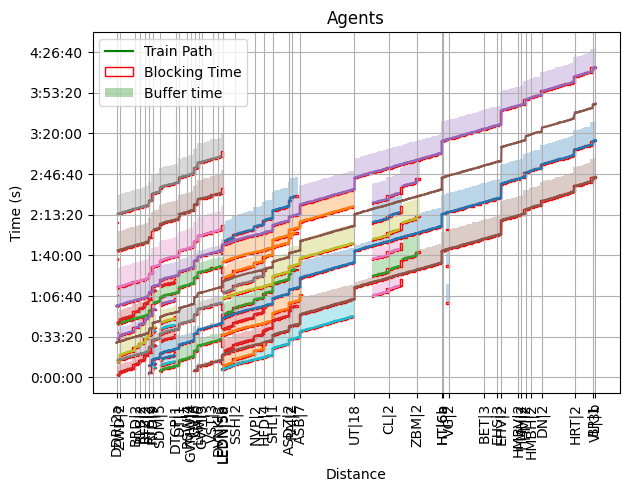

In [9]:
exp = experiments[-1]
exp.s.plot(agent_id, exp.block_intervals, exp.buffer_times, exp.recovery_times, True)

In [10]:
timeout = 300
run_experiments(experiments, timeout, filter_tracks=allowed_nodes)

KeyboardInterrupt: 

## Results


### Time statistics

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 [Text(-1.0, 0, 'route to ASDZ|2'),
  Text(0.0, 0, 'route to RTB|2'),
  Text(1.0, 0, 'route to RTD|9'),
  Text(2.0, 0, 'route to SDM|5'),
  Text(3.0, 0, 'route to DT|1'),
  Text(4.0, 0, 'route to GV|6'),
  Text(5.0, 0, 'route to LAA|6'),
  Text(6.0, 0, 'route to LEDN|5b'),
  Text(7.0, 0, 'route to ASDZ|2'),
  Text(8.0, 0, '')])

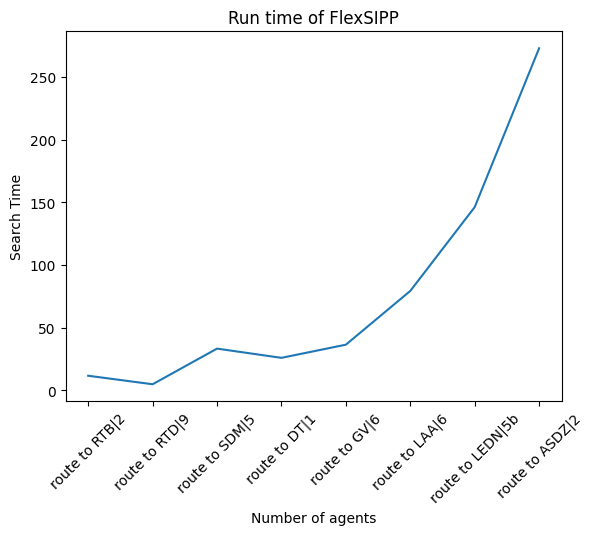

In [11]:
def sum_cols(df1, cols, name):
    df2 = df1.drop(columns=cols)
    df2[name] = df1[cols].sum(axis=1)
    return df2

time_df = pd.DataFrame([exp.get_running_time() for exp in experiments], index=[exp.metadata['label'] for exp in experiments])

setup_cols = ["track graph creation", "routing graph creation"]
recompute_cols = ["unsafe interval generation", "safe interval generation", "bt and crt generation", "converting routes to blocks"]
search_cols = ["FlexSIPP search time"]

time_df = sum_cols(time_df, setup_cols, "Setup Time")
time_df = sum_cols(time_df, recompute_cols, "Recompute Time")
time_df = sum_cols(time_df, search_cols, "Search Time")
time_df.loc[time_df["Search Time"] > -1]["Search Time"].plot()
plt.xlabel("Number of agents")
plt.ylabel("Search Time")
plt.title("Run time of FlexSIPP")
plt.xticks(rotation=45)

### Search Node Statistics


In [12]:
nodes_df = pd.DataFrame([exp.get_complexity() for exp in experiments], index=[exp.metadata['label'] for exp in experiments])

nodes_df

,nodes generated,nodes decreased,nodes expanded
route to RTB|2,328,19,162
route to RTD|9,139,16,72
route to SDM|5,850,116,315
route to DT|1,620,122,278
route to GV|6,595,153,315
route to LAA|6,2163,219,999
route to LEDN|5b,3186,553,1676
route to SHL|1,-1,-1,-1
route to ASDZ|2,10021,477,5095
route to ASB|7,-1,-1,-1


### Output paths found


In [33]:
for key, value in experiments[2].results[3].items():
    delayed_trains = {i: v for i,v in enumerate(value[0][4]) if float(v[0]) > 0}
    print(f"{key.replace('r-', '')}\nearliest departure: {int(min(float(value[0][1]), float(value[0][2])) / 60)}\ndepart before: {int(float(value[0][2]) / 60)}\narrive at: {int((float(value[0][1]) + float(value[0][3])) / 60)}\ndelays trains: {delayed_trains}")

Ddr|1238;Ddr|1308;Zwd|1316;Zwd|1338;Kfhaz|1364;Kfhaz_Rlb|1406;Kfhaz_Rlb|1426;Kfhaz_Rlb|1446;Kfhaz_Rlb|1466;Kfhaz_Rlb|1486;Rlb|866;Rlb|896;Rtst|974;Rtd_Rtst|606;Rtd_Rtst|626;Rtd_Rtst|646;Rtd_Rtst|656;Rtd|386;Rtd|278;Rtd|178;Rmoa_Rtd|168;Rmoa_Rtd|146;Rmoa_Rtd|122;Sdm|102;Sdm|78;Sdm|52
earliest departure: 28
depart before: 28
arrive at: 38
delays trains: {33: ['297.801', '310.577', '886.708'], 106: ['71.2693', '84.0448', '474.443']}
Ddr|1238;Ddr|1302;Zwd|1310;Zwd|1332;Zwd|1356;Kfhaz_Rlb|1400;Kfhaz_Rlb|1420;Kfhaz_Rlb|1440;Kfhaz_Rlb|1460;Kfhaz_Rlb|1480;Rlb|860;Rlb|890;Rtst|922;Rtst|966;Rtd_Rtst|602;Rtd_Rtst|622;Rtd_Rtst|642;Rtd_Rtst|652;Rtd|382;Rtd|276;Rtd|178;Rmoa_Rtd|168;Rmoa_Rtd|146;Rmoa_Rtd|122;Sdm|102;Sdm|78;Sdm|52
earliest departure: 28
depart before: 28
arrive at: 38
delays trains: {15: ['343.202', '358.924', '408.527'], 106: ['13.4095', '29.1316', '474.443']}
Ddr|1238;Ddr|1308;Zwd|1316;Zwd|1338;Kfhaz|1364;Kfhaz_Rlb|1406;Kfhaz_Rlb|1426;Kfhaz_Rlb|1446;Kfhaz_Rlb|1466;Kfhaz_Rlb|1486;Rlb

### Path statistics


,Search Time
Average path length,
17.500000,11.657
19.000000,4.871
26.333333,33.295
37.000000,25.930
46.000000,36.429
48.333333,79.284
60.000000,146.128
90.444444,272.821


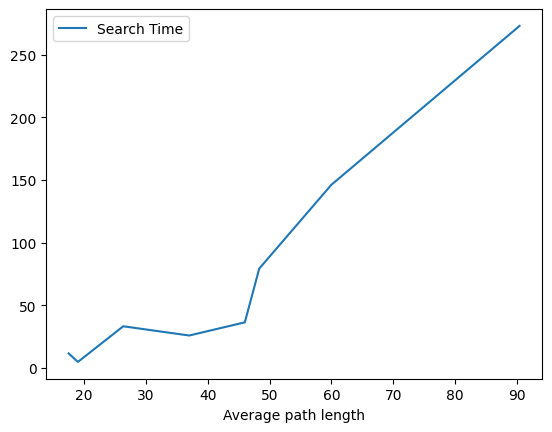

In [37]:
path_df = pd.DataFrame({exp.metadata["label"]: np.mean([len(path.split(";")) for path in exp.results[2]]) for exp in experiments if exp.results}, index=["Average path length"]).transpose()
path_df.join(time_df["Search Time"]).set_index("Average path length").plot()
path_df.join(time_df["Search Time"]).set_index("Average path length")